# Demo2: Simple Harmonic Oscillator with RK2/RK4

In this jupyter notebook, we will learn how to use the Runge-Kutta 2/4 methods to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
\frac{dx}{dt} = v,
$$
and 
$$
\frac{dv}{dt} = a.
$$


### Runge-Jutta methods

Higher-order explicit schemes.

* RK2

$$
y_{k+1} = y_k + \frac{h_k}{2}(k_1 + k_2),
$$
where $k_1 = f(t_k, y_k)$ and $k_2 = f(t_k+h_k, y_k + h_k k1)$.

* RK4

$$
y_{k+1} = y_k + \frac{h_k}{6}(k_1 +2k_2 +2k_3+k_4),
$$
where $k_1= f(t_k,y_k)$, $k_2=f(t_k+h_k/2, y_k + (h_k/2)k_1)$,
$k_3=f(t_k+h_k/2, y_k + (h_k/2)k_2)$, and $k_4=f(t_k+h_k, y_k+h_k k_3)$.


### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: Redo demo1 with the RK2 method
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [ ]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def RK2(x,v,dt,omega):
    k1x = v
    k1v = -omega**2*x
    k2x = v+dt*k1v
    k2v = -omega**2*(x+dt*k1x)
    xn = x+0.5*dt*(k1x+k2x)
    vn = v+0.5*dt*(k1v+k2v)

    return xn, vn

In [65]:
# parameters
A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.01
T1 = 50
N = int(T1/dt)
times = np.linspace(0,T1,N+1)

In [66]:
# This is a simple example of how to solve a simple harmonic oscillator using the RK2 method
# TODO:
posx = np.zeros(N+1)
v = np.zeros(N+1)
posx[0] = 1
v[0] = 0   
''''''
for i in range(N):
    posx[i+1] = RK2(x=posx[i],v=v[i],dt=dt,omega=omega0)[0]
    v[i+1] = RK2(posx[i],v[i],dt,omega0)[1]


In [ ]:
# Step 5: plot the solution
plt.plot(times,posx)
plt.plot(times,v)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

In [70]:
# Step 6: evaluate the analytical solution

# TODO:
TA = np.zeros([N+1,2])
TA[:,0] = np.cos(omega0*times)
TA[:,1] = -np.sin(omega0*times)
'''
plt.plot(times,posx, "r-", label = "RK2")
plt.plot(times,TA[:,0], "r--", label = "analytical")
plt.plot(times,v, "b-", label = "RK2")
plt.plot(times,TA[:,1], "b--", label = "analytical")
plt.legend()
plt.grid()
plt.show()
'''

'\nplt.plot(times,posx, "r-", label = "RK2")\nplt.plot(times,TA[:,0], "r--", label = "analytical")\nplt.plot(times,v, "b-", label = "RK2")\nplt.plot(times,TA[:,1], "b--", label = "analytical")\nplt.legend()\nplt.grid()\nplt.show()\n'

Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

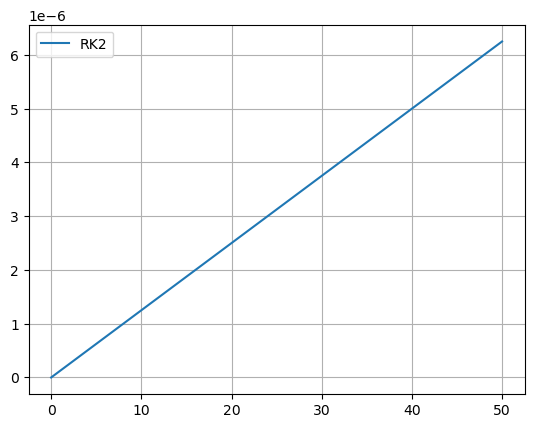

In [73]:
# Step 7: evaluate the energy (error) of the system

# TODO:
EN = 0.5*k*posx**2+0.5*m*v**2
EA = 0.5*k*TA[:,0]**2+0.5*m*TA[:,1]**2
plt.plot(times,EN-EA, label = "RK2")
plt.legend()
plt.grid()
plt.show()


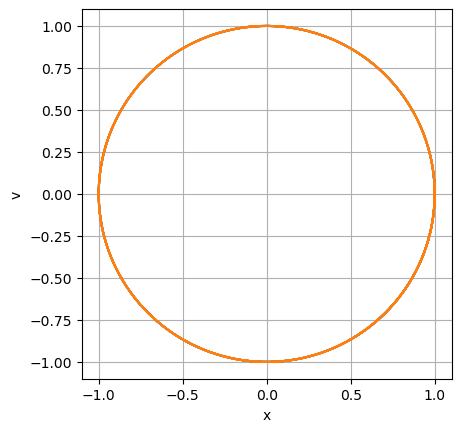

In [47]:
# Step 8: evaluate the phase space

# TODO:
plt.plot(posx,v)
plt.plot(TA[:,0],TA[:,1])
plt.grid()
plt.xlabel("x")
plt.ylabel("v")
plt.axis("square")
plt.show()


## Exercise 2: Repeat with RK4


In [61]:
# Notice that k3x and k4x need to consider k2x and k3x
'''
func(y) = np.array([y[1], func(y[0])])
k1 = func(y)
k2 = func(y+0.5*dt*k1)
k3 = func(y+0.5*dt*k2)
k4 = func(y+dt*k3)
'''

def RK4(x,v,dt,omega):
    k1x = v
    k1v = -omega**2*x
    k2x = v+0.5*dt*k1v
    k2v = -omega**2*(x+0.5*dt*k1x)
    k3x = v+0.5*dt*k2v
    k3v = -omega**2*(x+0.5*dt*k2x)
    k4x = v+dt*k3v
    k4v = -omega**2*(x+dt*k3x)

    xn = x+dt/6*(k1x+2*k2x+2*k3x+k4x)
    vn = v+dt/6*(k1v+2*k2v+2*k3v+k4v)

    return xn, vn

In [62]:
# This is a simple example of how to solve a simple harmonic oscillator using the RK4 method

# TODO:
posx = np.zeros(N+1)
v = np.zeros(N+1)
posx[0] = 1
v[0] = 0   
''''''
for i in range(N):
    posx[i+1] = RK4(x=posx[i],v=v[i],dt=dt,omega=omega0)[0]
    v[i+1] = RK4(posx[i],v[i],dt,omega0)[1]


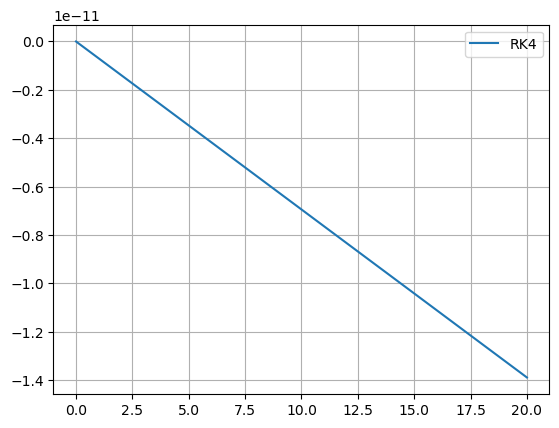

In [64]:
TA = np.zeros([N+1,2])
TA[:,0] = np.cos(omega0*times)
TA[:,1] = -np.sin(omega0*times)
'''
plt.figure(1)
plt.plot(times,posx, "r-", label = "RK4")
plt.plot(times,TA[:,0], "r--", label = "analytical")
plt.plot(times,v, "b-", label = "RK4")
plt.plot(times,TA[:,1], "b--", label = "analytical")
plt.legend()
plt.grid()
'''
plt.figure(2)
KN = 0.5*m*v**2
KA = 0.5*m*TA[:,1]**2
UN = 0.5*k*posx**2
UA = 0.5*k*TA[:,0]**2
EN = KN+UN
EA = KA+UA
plt.plot(times,(EN-EA), label = "RK4")
plt.legend()
plt.grid()

